In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('/content/patient_data.csv')

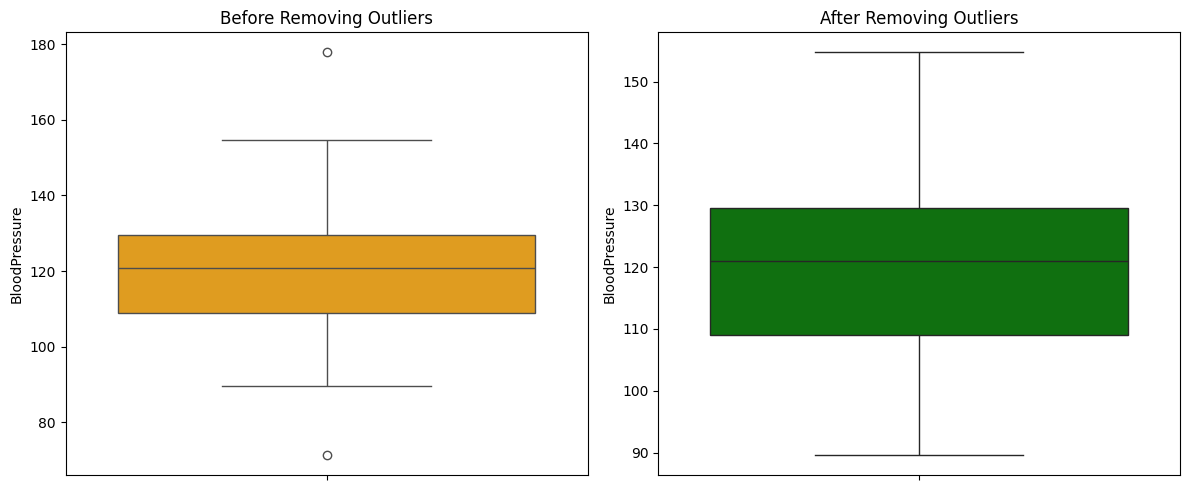

In [7]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_clean = df[(df['BloodPressure'] >= lower) & (df['BloodPressure'] <= upper)]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['BloodPressure'], color='orange')
plt.title("Before Removing Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean['BloodPressure'], color='green')
plt.title("After Removing Outliers")
plt.tight_layout()
plt.show()

In [12]:
#  Q2: Hypothesis Testing
from scipy import stats
from scipy.stats import chi2_contingency

t_stat, p_val = stats.ttest_1samp(df['CholesterolLevel'], popmean=195)
print("One-Sample T-Test (Cholesterol vs 195 mg/dL)")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value    : {p_val:.3f}")
if p_val < 0.05:
    print("Reject H₀: Mean is significantly different from 195")
else:
    print("Fail to reject H₀: No significant difference")


contingency = pd.crosstab(df['Gender'], df['RiskCategory'])
chi2, p_val_chi, dof, exp = chi2_contingency(contingency)
print("\nChi-Square Test (Gender vs RiskCategory)")
print(f"Chi² stat  : {chi2:.3f}")
print(f"p-value    : {p_val_chi:.3f}")
if p_val_chi < 0.05:
    print("Reject H₀: Relationship exists")
else:
    print("Fail to reject H₀: No significant relationship")

One-Sample T-Test (Cholesterol vs 195 mg/dL)
t-statistic: 2.400
p-value    : 0.018
Reject H₀: Mean is significantly different from 195

Chi-Square Test (Gender vs RiskCategory)
Chi² stat  : 1.277
p-value    : 0.528
Fail to reject H₀: No significant relationship


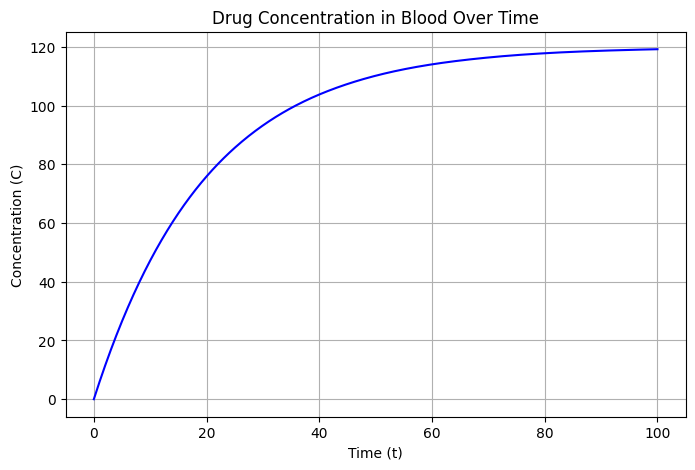

In [11]:
#  Q3: Modeling ODE - dC/dt = k(D - C)
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def dC_dt(t, C, k=0.05, D=120):
    return k * (D - C)

t_span = (0, 100)
t_eval = np.linspace(0, 100, 500)
C0 = [0]

solution = solve_ivp(dC_dt, t_span, C0, t_eval=t_eval)

plt.figure(figsize=(8, 5))
plt.plot(solution.t, solution.y[0], color='blue')
plt.title("Drug Concentration in Blood Over Time")
plt.xlabel("Time (t)")
plt.ylabel("Concentration (C)")
plt.grid(True)
plt.show()
